In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
import tensorflow_probability as tfp

### 1. Data

In [29]:
#df = pd.read_csv("data/data_regression.csv", index_col=0)
df = pd.read_csv("data/hien_data.csv")
df["profitability"] = df.gross / (df.budget + 1) # avoid budget = 0
df = df.drop([*df.select_dtypes(['object']).columns, "gross"], axis=1) # drop all the qualitative columns

In [30]:
df.dtypes

Unnamed: 0                     int64
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
Biography                      int64
Comedy                         int64
Crime                          int64
Drama                          int64
Romance                        int64
Mystery_Thriller_Horror        int64
Sci-Fi_Fantasy                 int64
Family_Animation               int64
Action_Adventure               int64
History_War                    int64
Others                         int64
profitability                float64
d

In [31]:
not_include = ["imdb_score", "profitability", "num_voted_users", "title_year", "num_critic_for_reviews",
              "num_user_for_reviews"]

In [32]:
X = df.loc[:, ~df.columns.isin(not_include)]
y1 = df[["imdb_score"]]

In [33]:
X

,Unnamed: 0,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,actor_2_facebook_likes,movie_facebook_likes,...,Comedy,Crime,Drama,Romance,Mystery_Thriller_Horror,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others
0,0,123.0,446.0,821.0,20000.0,22209,1.0,48000000.0,1000.0,0,...,1,0,0,1,0,1,0,0,0,0
1,1,88.0,104.0,318.0,628.0,2726,0.0,3500000.0,575.0,16000,...,1,0,0,0,0,0,0,0,0,0
2,2,104.0,116.0,83.0,1000.0,1662,0.0,4500000.0,511.0,0,...,0,0,1,1,0,0,0,1,0,0
3,3,148.0,644.0,326.0,1000.0,2566,1.0,27000000.0,809.0,14000,...,1,1,0,0,0,0,0,1,0,1
4,4,98.0,11000.0,484.0,13000.0,14921,3.0,6000000.0,573.0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873,3873,81.0,26.0,300.0,2000.0,3344,0.0,4900000.0,509.0,0,...,0,0,0,0,1,0,0,0,0,0
3874,3874,120.0,18.0,295.0,634.0,1810,11.0,5000000.0,420.0,0,...,0,0,1,0,0,0,0,0,0,0
3875,3875,96.0,23.0,503.0,927.0,3552,6.0,5000000.0,509.0,740,...,1,0,0,1,0,0,0,0,0,0
3876,3876,115.0,32.0,29.0,14000.0,14133,1.0,12620000.0,81.0,139,...,0,0,1,0,0,0,0,1,1,0


In [34]:
X_stats = X.describe().transpose()
def norm(x):
    return (x - X_stats["mean"])/X_stats["std"]

normed_X = norm(X)

In [35]:
normed_X.keys()

Index(['Unnamed: 0', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes',
       'cast_total_facebook_likes', 'facenumber_in_poster', 'budget',
       'actor_2_facebook_likes', 'movie_facebook_likes', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Romance', 'Mystery_Thriller_Horror',
       'Sci-Fi_Fantasy', 'Family_Animation', 'Action_Adventure', 'History_War',
       'Others'],
      dtype='object')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(normed_X, y1, test_size=0.33, random_state=42)
# train_dataset = tf.data.Dataset.from_tensor_slices((np.array(X_train), np.array(y2_train)))
# test_dataset = tf.data.Dataset.from_tensor_slices((np.array(X_test), np.array(y2_test)))

### 2. Predict IMDB Scores

In [37]:
model = tfk.Sequential([
    #tfk.Input(shape=(25,)),
    #tfkl.BatchNormalization(), # normalise data here
    tfkl.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tfkl.Dense(32, activation='relu'),
    tfkl.Dense(1)
])

In [38]:
model.compile(optimizer=tf.optimizers.Adam(1e-4), loss=tfk.losses.mean_squared_error, metrics=["mse", "mae"])

In [39]:
model.fit(np.array(X_train), np.array(y_train), validation_split=0.2, batch_size=100, 
          epochs=500, workers=10, use_multiprocessing=True)

Train on 2078 samples, validate on 520 samples
Epoch 1/500
2078/2078 [==============================] - 1s 287us/sample - loss: 38.3283 - mse: 38.3283 - mae: 6.0914 - val_loss: 36.6246 - val_mse: 36.6246 - val_mae: 5.9524
Epoch 2/500
2078/2078 [==============================] - 0s 25us/sample - loss: 36.5290 - mse: 36.5290 - mae: 5.9427 - val_loss: 34.8663 - val_mse: 34.8663 - val_mae: 5.8023
Epoch 3/500
2078/2078 [==============================] - 0s 27us/sample - loss: 34.7518 - mse: 34.7518 - mae: 5.7921 - val_loss: 33.1491 - val_mse: 33.1491 - val_mae: 5.6511
Epoch 4/500
2078/2078 [==============================] - 0s 27us/sample - loss: 33.0076 - mse: 33.0076 - mae: 5.6385 - val_loss: 31.4305 - val_mse: 31.4305 - val_mae: 5.4950
Epoch 5/500
2078/2078 [==============================] - 0s 26us/sample - loss: 31.2670 - mse: 31.2670 - mae: 5.4806 - val_loss: 29.7197 - val_mse: 29.7197 - val_mae: 5.3345
Epoch 6/500
2078/2078 [==============================] - 0s 27us/sample - loss: 29

2078/2078 [==============================] - 0s 24us/sample - loss: 2.4405 - mse: 2.4405 - mae: 1.0434 - val_loss: 1.7553 - val_mse: 1.7553 - val_mae: 1.0049
Epoch 49/500
2078/2078 [==============================] - 0s 26us/sample - loss: 2.3930 - mse: 2.3930 - mae: 1.0359 - val_loss: 1.7413 - val_mse: 1.7413 - val_mae: 1.0007
Epoch 50/500
2078/2078 [==============================] - 0s 23us/sample - loss: 2.3484 - mse: 2.3484 - mae: 1.0296 - val_loss: 1.7230 - val_mse: 1.7230 - val_mae: 0.9942
Epoch 51/500
2078/2078 [==============================] - 0s 22us/sample - loss: 2.3247 - mse: 2.3247 - mae: 1.0258 - val_loss: 1.7098 - val_mse: 1.7098 - val_mae: 0.9910
Epoch 52/500
2078/2078 [==============================] - 0s 23us/sample - loss: 2.2748 - mse: 2.2748 - mae: 1.0181 - val_loss: 1.6913 - val_mse: 1.6913 - val_mae: 0.9835
Epoch 53/500
2078/2078 [==============================] - 0s 23us/sample - loss: 2.2401 - mse: 2.2401 - mae: 1.0099 - val_loss: 1.6728 - val_mse: 1.6728 - val

Epoch 96/500
2078/2078 [==============================] - 0s 26us/sample - loss: 1.3811 - mse: 1.3811 - mae: 0.8550 - val_loss: 1.2977 - val_mse: 1.2977 - val_mae: 0.8426
Epoch 97/500
2078/2078 [==============================] - 0s 28us/sample - loss: 1.3696 - mse: 1.3696 - mae: 0.8528 - val_loss: 1.2917 - val_mse: 1.2917 - val_mae: 0.8404
Epoch 98/500
2078/2078 [==============================] - 0s 28us/sample - loss: 1.3571 - mse: 1.3571 - mae: 0.8494 - val_loss: 1.2853 - val_mse: 1.2853 - val_mae: 0.8379
Epoch 99/500
2078/2078 [==============================] - 0s 27us/sample - loss: 1.3470 - mse: 1.3470 - mae: 0.8469 - val_loss: 1.2800 - val_mse: 1.2800 - val_mae: 0.8359
Epoch 100/500
2078/2078 [==============================] - 0s 27us/sample - loss: 1.3344 - mse: 1.3344 - mae: 0.8445 - val_loss: 1.2748 - val_mse: 1.2748 - val_mae: 0.8341
Epoch 101/500
2078/2078 [==============================] - 0s 29us/sample - loss: 1.3246 - mse: 1.3246 - mae: 0.8418 - val_loss: 1.2689 - val_ms

Epoch 144/500
2078/2078 [==============================] - 0s 30us/sample - loss: 0.9999 - mse: 0.9999 - mae: 0.7533 - val_loss: 1.0758 - val_mse: 1.0758 - val_mae: 0.7610
Epoch 145/500
2078/2078 [==============================] - 0s 26us/sample - loss: 0.9948 - mse: 0.9948 - mae: 0.7523 - val_loss: 1.0713 - val_mse: 1.0713 - val_mae: 0.7592
Epoch 146/500
2078/2078 [==============================] - 0s 26us/sample - loss: 0.9906 - mse: 0.9906 - mae: 0.7503 - val_loss: 1.0687 - val_mse: 1.0687 - val_mae: 0.7579
Epoch 147/500
2078/2078 [==============================] - 0s 25us/sample - loss: 0.9852 - mse: 0.9852 - mae: 0.7478 - val_loss: 1.0666 - val_mse: 1.0666 - val_mae: 0.7555
Epoch 148/500
2078/2078 [==============================] - 0s 24us/sample - loss: 0.9806 - mse: 0.9806 - mae: 0.7466 - val_loss: 1.0626 - val_mse: 1.0626 - val_mae: 0.7551
Epoch 149/500
2078/2078 [==============================] - 0s 26us/sample - loss: 0.9757 - mse: 0.9757 - mae: 0.7447 - val_loss: 1.0603 - va

2078/2078 [==============================] - 0s 27us/sample - loss: 0.8231 - mse: 0.8231 - mae: 0.6862 - val_loss: 0.9598 - val_mse: 0.9598 - val_mae: 0.7068
Epoch 192/500
2078/2078 [==============================] - 0s 28us/sample - loss: 0.8210 - mse: 0.8210 - mae: 0.6864 - val_loss: 0.9547 - val_mse: 0.9547 - val_mae: 0.7069
Epoch 193/500
2078/2078 [==============================] - 0s 26us/sample - loss: 0.8179 - mse: 0.8179 - mae: 0.6842 - val_loss: 0.9563 - val_mse: 0.9563 - val_mae: 0.7050
Epoch 194/500
2078/2078 [==============================] - 0s 25us/sample - loss: 0.8150 - mse: 0.8150 - mae: 0.6835 - val_loss: 0.9527 - val_mse: 0.9527 - val_mae: 0.7051
Epoch 195/500
2078/2078 [==============================] - 0s 24us/sample - loss: 0.8124 - mse: 0.8124 - mae: 0.6826 - val_loss: 0.9526 - val_mse: 0.9526 - val_mae: 0.7037
Epoch 196/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.8099 - mse: 0.8099 - mae: 0.6811 - val_loss: 0.9506 - val_mse: 0.9506 

Epoch 239/500
2078/2078 [==============================] - 0s 33us/sample - loss: 0.7234 - mse: 0.7234 - mae: 0.6425 - val_loss: 0.8929 - val_mse: 0.8929 - val_mae: 0.6766
Epoch 240/500
2078/2078 [==============================] - 0s 31us/sample - loss: 0.7214 - mse: 0.7214 - mae: 0.6422 - val_loss: 0.8933 - val_mse: 0.8933 - val_mae: 0.6753
Epoch 241/500
2078/2078 [==============================] - 0s 33us/sample - loss: 0.7202 - mse: 0.7202 - mae: 0.6407 - val_loss: 0.8941 - val_mse: 0.8941 - val_mae: 0.6752
Epoch 242/500
2078/2078 [==============================] - 0s 28us/sample - loss: 0.7188 - mse: 0.7188 - mae: 0.6411 - val_loss: 0.8902 - val_mse: 0.8902 - val_mae: 0.6750
Epoch 243/500
2078/2078 [==============================] - 0s 27us/sample - loss: 0.7169 - mse: 0.7169 - mae: 0.6393 - val_loss: 0.8909 - val_mse: 0.8909 - val_mae: 0.6739
Epoch 244/500
2078/2078 [==============================] - 0s 30us/sample - loss: 0.7155 - mse: 0.7155 - mae: 0.6386 - val_loss: 0.8901 - va

2078/2078 [==============================] - 0s 24us/sample - loss: 0.6614 - mse: 0.6614 - mae: 0.6151 - val_loss: 0.8488 - val_mse: 0.8488 - val_mae: 0.6601
Epoch 287/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.6605 - mse: 0.6605 - mae: 0.6131 - val_loss: 0.8504 - val_mse: 0.8504 - val_mae: 0.6595
Epoch 288/500
2078/2078 [==============================] - 0s 24us/sample - loss: 0.6596 - mse: 0.6596 - mae: 0.6129 - val_loss: 0.8499 - val_mse: 0.8499 - val_mae: 0.6593
Epoch 289/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.6584 - mse: 0.6584 - mae: 0.6126 - val_loss: 0.8464 - val_mse: 0.8464 - val_mae: 0.6590
Epoch 290/500
2078/2078 [==============================] - 0s 26us/sample - loss: 0.6570 - mse: 0.6570 - mae: 0.6115 - val_loss: 0.8486 - val_mse: 0.8486 - val_mae: 0.6585
Epoch 291/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.6564 - mse: 0.6564 - mae: 0.6107 - val_loss: 0.8470 - val_mse: 0.8470 

Epoch 334/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.6177 - mse: 0.6177 - mae: 0.5923 - val_loss: 0.8183 - val_mse: 0.8183 - val_mae: 0.6491
Epoch 335/500
2078/2078 [==============================] - 0s 21us/sample - loss: 0.6167 - mse: 0.6167 - mae: 0.5909 - val_loss: 0.8193 - val_mse: 0.8193 - val_mae: 0.6480
Epoch 336/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.6159 - mse: 0.6159 - mae: 0.5904 - val_loss: 0.8177 - val_mse: 0.8177 - val_mae: 0.6482
Epoch 337/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.6153 - mse: 0.6153 - mae: 0.5902 - val_loss: 0.8162 - val_mse: 0.8162 - val_mae: 0.6477
Epoch 338/500
2078/2078 [==============================] - 0s 21us/sample - loss: 0.6145 - mse: 0.6145 - mae: 0.5901 - val_loss: 0.8161 - val_mse: 0.8161 - val_mae: 0.6481
Epoch 339/500
2078/2078 [==============================] - 0s 21us/sample - loss: 0.6141 - mse: 0.6141 - mae: 0.5905 - val_loss: 0.8161 - va

2078/2078 [==============================] - 0s 21us/sample - loss: 0.5863 - mse: 0.5863 - mae: 0.5736 - val_loss: 0.8027 - val_mse: 0.8027 - val_mae: 0.6433
Epoch 382/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.5850 - mse: 0.5850 - mae: 0.5741 - val_loss: 0.8017 - val_mse: 0.8017 - val_mae: 0.6429
Epoch 383/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.5846 - mse: 0.5846 - mae: 0.5733 - val_loss: 0.8021 - val_mse: 0.8021 - val_mae: 0.6424
Epoch 384/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.5838 - mse: 0.5838 - mae: 0.5742 - val_loss: 0.7996 - val_mse: 0.7996 - val_mae: 0.6423
Epoch 385/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.5841 - mse: 0.5841 - mae: 0.5726 - val_loss: 0.8024 - val_mse: 0.8024 - val_mae: 0.6421
Epoch 386/500
2078/2078 [==============================] - 0s 21us/sample - loss: 0.5823 - mse: 0.5823 - mae: 0.5726 - val_loss: 0.8005 - val_mse: 0.8005 

Epoch 429/500
2078/2078 [==============================] - 0s 21us/sample - loss: 0.5595 - mse: 0.5595 - mae: 0.5593 - val_loss: 0.7943 - val_mse: 0.7943 - val_mae: 0.6385
Epoch 430/500
2078/2078 [==============================] - 0s 21us/sample - loss: 0.5586 - mse: 0.5586 - mae: 0.5591 - val_loss: 0.7936 - val_mse: 0.7936 - val_mae: 0.6389
Epoch 431/500
2078/2078 [==============================] - 0s 21us/sample - loss: 0.5583 - mse: 0.5583 - mae: 0.5590 - val_loss: 0.7949 - val_mse: 0.7949 - val_mae: 0.6389
Epoch 432/500
2078/2078 [==============================] - 0s 21us/sample - loss: 0.5584 - mse: 0.5584 - mae: 0.5574 - val_loss: 0.7927 - val_mse: 0.7927 - val_mae: 0.6384
Epoch 433/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.5574 - mse: 0.5574 - mae: 0.5584 - val_loss: 0.7937 - val_mse: 0.7937 - val_mae: 0.6391
Epoch 434/500
2078/2078 [==============================] - 0s 21us/sample - loss: 0.5574 - mse: 0.5574 - mae: 0.5572 - val_loss: 0.7948 - va

2078/2078 [==============================] - 0s 21us/sample - loss: 0.5389 - mse: 0.5389 - mae: 0.5475 - val_loss: 0.7913 - val_mse: 0.7913 - val_mae: 0.6381
Epoch 477/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.5381 - mse: 0.5381 - mae: 0.5475 - val_loss: 0.7916 - val_mse: 0.7916 - val_mae: 0.6381
Epoch 478/500
2078/2078 [==============================] - 0s 21us/sample - loss: 0.5385 - mse: 0.5385 - mae: 0.5473 - val_loss: 0.7913 - val_mse: 0.7913 - val_mae: 0.6376
Epoch 479/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.5379 - mse: 0.5379 - mae: 0.5471 - val_loss: 0.7915 - val_mse: 0.7915 - val_mae: 0.6380
Epoch 480/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.5375 - mse: 0.5375 - mae: 0.5477 - val_loss: 0.7911 - val_mse: 0.7911 - val_mae: 0.6380
Epoch 481/500
2078/2078 [==============================] - 0s 25us/sample - loss: 0.5374 - mse: 0.5374 - mae: 0.5474 - val_loss: 0.7911 - val_mse: 0.7911 

In [40]:
preds = model.predict(np.array(X_test)).flatten()

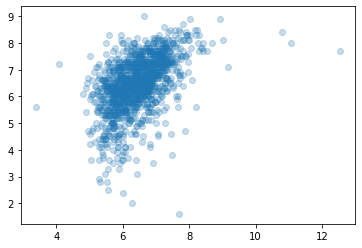

In [41]:
plt.scatter(preds, np.array(y_test).flatten(), alpha=0.25) # some correlations going on here but definitely not linear

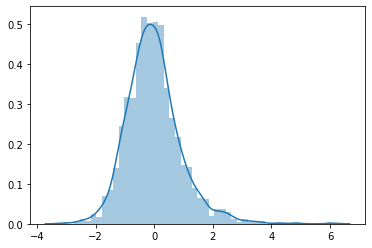

In [42]:
errors = preds - np.array(y_test).flatten()
sns.distplot(errors) # We expect the distribution to be normal around zero!

### 3. Predict Profitability

#### 3.1. Traditional neural network predicting log profitability

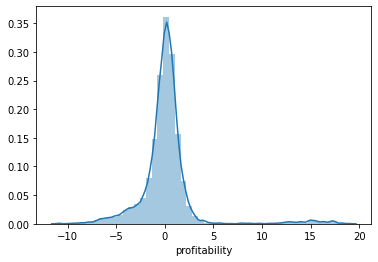

In [43]:
sns.distplot(np.log(df["profitability"]))

In [44]:
df.dtypes

Unnamed: 0                     int64
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
Biography                      int64
Comedy                         int64
Crime                          int64
Drama                          int64
Romance                        int64
Mystery_Thriller_Horror        int64
Sci-Fi_Fantasy                 int64
Family_Animation               int64
Action_Adventure               int64
History_War                    int64
Others                         int64
profitability                float64
d

In [45]:
# not_include = ["imdb_score", "profitability", "num_voted_users", "title_year", "num_critic_for_reviews",
#               "num_user_for_reviews"]
# X = 
y2 = np.log(df["profitability"])

In [46]:
# X remains the same, but labels are now y2
X_train, X_test, y_train, y_test = train_test_split(normed_X, y2, test_size=0.33, random_state=42)

In [61]:
model2 = tfk.Sequential([
    #tfk.Input(shape=(25,)),
    #tfkl.BatchNormalization(), # normalise data here
    tfkl.Dense(128, activation='selu', input_shape=[X_train.shape[1]]),
    tfkl.Dense(64, activation='selu'),
    tfkl.Dense(32, activation='selu'),
    tfkl.Dense(1)
])

model2.compile(optimizer=tf.optimizers.Adam(1e-3), loss=tfk.losses.mean_squared_error, metrics=["mse", "mae"])
model2.fit(np.array(X_train), np.array(y_train), validation_split=0.2, batch_size=128, 
          epochs=1000, workers=10, use_multiprocessing=True)

Train on 2078 samples, validate on 520 samples
Epoch 1/1000
2078/2078 [==============================] - 0s 229us/sample - loss: 8.9173 - mse: 8.9173 - mae: 1.5857 - val_loss: 9.0155 - val_mse: 9.0155 - val_mae: 1.6897
Epoch 2/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 8.6108 - mse: 8.6108 - mae: 1.5810 - val_loss: 8.7836 - val_mse: 8.7836 - val_mae: 1.6067
Epoch 3/1000
2078/2078 [==============================] - 0s 28us/sample - loss: 8.4746 - mse: 8.4746 - mae: 1.5495 - val_loss: 8.6986 - val_mse: 8.6986 - val_mae: 1.6115
Epoch 4/1000
2078/2078 [==============================] - 0s 27us/sample - loss: 8.3841 - mse: 8.3841 - mae: 1.5408 - val_loss: 8.7517 - val_mse: 8.7517 - val_mae: 1.6350
Epoch 5/1000
2078/2078 [==============================] - 0s 30us/sample - loss: 8.2583 - mse: 8.2583 - mae: 1.5027 - val_loss: 8.7217 - val_mse: 8.7217 - val_mae: 1.6182
Epoch 6/1000
2078/2078 [==============================] - 0s 26us/sample - loss: 8.2410 - mse: 8.

2078/2078 [==============================] - 0s 24us/sample - loss: 6.8203 - mse: 6.8203 - mae: 1.4886 - val_loss: 9.5458 - val_mse: 9.5458 - val_mae: 1.9266
Epoch 49/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 6.7282 - mse: 6.7282 - mae: 1.4648 - val_loss: 9.2517 - val_mse: 9.2517 - val_mae: 1.7823
Epoch 50/1000
2078/2078 [==============================] - 0s 23us/sample - loss: 6.6457 - mse: 6.6457 - mae: 1.4684 - val_loss: 9.3722 - val_mse: 9.3722 - val_mae: 1.8281
Epoch 51/1000
2078/2078 [==============================] - 0s 23us/sample - loss: 6.6545 - mse: 6.6545 - mae: 1.4838 - val_loss: 9.4328 - val_mse: 9.4328 - val_mae: 1.8436
Epoch 52/1000
2078/2078 [==============================] - 0s 24us/sample - loss: 6.6666 - mse: 6.6666 - mae: 1.4667 - val_loss: 9.3941 - val_mse: 9.3941 - val_mae: 1.8692
Epoch 53/1000
2078/2078 [==============================] - 0s 23us/sample - loss: 6.5390 - mse: 6.5390 - mae: 1.4655 - val_loss: 9.4991 - val_mse: 9.4991 

2078/2078 [==============================] - 0s 34us/sample - loss: 5.7112 - mse: 5.7112 - mae: 1.4930 - val_loss: 10.0725 - val_mse: 10.0725 - val_mae: 2.0021
Epoch 96/1000
2078/2078 [==============================] - 0s 27us/sample - loss: 5.4637 - mse: 5.4637 - mae: 1.4277 - val_loss: 10.1518 - val_mse: 10.1518 - val_mae: 1.9914
Epoch 97/1000
2078/2078 [==============================] - 0s 28us/sample - loss: 5.4856 - mse: 5.4856 - mae: 1.4329 - val_loss: 10.2847 - val_mse: 10.2847 - val_mae: 2.0748
Epoch 98/1000
2078/2078 [==============================] - 0s 36us/sample - loss: 5.4663 - mse: 5.4663 - mae: 1.4544 - val_loss: 10.1540 - val_mse: 10.1540 - val_mae: 1.9977
Epoch 99/1000
2078/2078 [==============================] - 0s 39us/sample - loss: 5.6092 - mse: 5.6092 - mae: 1.4475 - val_loss: 10.5666 - val_mse: 10.5666 - val_mae: 2.0232
Epoch 100/1000
2078/2078 [==============================] - ETA: 0s - loss: 5.5038 - mse: 5.5038 - mae: 1.428 - 0s 56us/sample - loss: 5.2675 - 

2078/2078 [==============================] - 0s 27us/sample - loss: 4.0054 - mse: 4.0054 - mae: 1.2662 - val_loss: 10.1765 - val_mse: 10.1765 - val_mae: 1.9710
Epoch 142/1000
2078/2078 [==============================] - 0s 32us/sample - loss: 4.0159 - mse: 4.0159 - mae: 1.2644 - val_loss: 10.5529 - val_mse: 10.5529 - val_mae: 1.9856
Epoch 143/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 4.1624 - mse: 4.1624 - mae: 1.2898 - val_loss: 11.0171 - val_mse: 11.0171 - val_mae: 2.0806
Epoch 144/1000
2078/2078 [==============================] - 0s 26us/sample - loss: 3.8948 - mse: 3.8948 - mae: 1.2570 - val_loss: 10.4964 - val_mse: 10.4964 - val_mae: 2.0409
Epoch 145/1000
2078/2078 [==============================] - 0s 24us/sample - loss: 3.8234 - mse: 3.8234 - mae: 1.2307 - val_loss: 10.5656 - val_mse: 10.5656 - val_mae: 2.0301
Epoch 146/1000
2078/2078 [==============================] - 0s 24us/sample - loss: 3.8136 - mse: 3.8136 - mae: 1.2303 - val_loss: 10.6771 - 

Epoch 188/1000
2078/2078 [==============================] - 0s 35us/sample - loss: 2.7689 - mse: 2.7689 - mae: 1.0816 - val_loss: 10.6575 - val_mse: 10.6575 - val_mae: 2.0315
Epoch 189/1000
2078/2078 [==============================] - 0s 22us/sample - loss: 2.7171 - mse: 2.7171 - mae: 1.0771 - val_loss: 10.6606 - val_mse: 10.6606 - val_mae: 2.0425
Epoch 190/1000
2078/2078 [==============================] - 0s 23us/sample - loss: 2.8171 - mse: 2.8171 - mae: 1.0988 - val_loss: 10.8021 - val_mse: 10.8021 - val_mae: 2.0638
Epoch 191/1000
2078/2078 [==============================] - 0s 30us/sample - loss: 2.7890 - mse: 2.7890 - mae: 1.1010 - val_loss: 10.5318 - val_mse: 10.5318 - val_mae: 2.0263
Epoch 192/1000
2078/2078 [==============================] - 0s 48us/sample - loss: 2.7674 - mse: 2.7674 - mae: 1.1005 - val_loss: 10.8467 - val_mse: 10.8467 - val_mae: 2.0926
Epoch 193/1000
2078/2078 [==============================] - 0s 45us/sample - loss: 2.6815 - mse: 2.6815 - mae: 1.0648 - val_l

Epoch 235/1000
2078/2078 [==============================] - 0s 22us/sample - loss: 1.9720 - mse: 1.9720 - mae: 0.9277 - val_loss: 10.9021 - val_mse: 10.9021 - val_mae: 2.0444
Epoch 236/1000
2078/2078 [==============================] - 0s 27us/sample - loss: 2.3857 - mse: 2.3857 - mae: 1.0140 - val_loss: 10.6467 - val_mse: 10.6467 - val_mae: 1.9892
Epoch 237/1000
2078/2078 [==============================] - 0s 24us/sample - loss: 2.2540 - mse: 2.2540 - mae: 0.9835 - val_loss: 10.8121 - val_mse: 10.8121 - val_mae: 1.9847
Epoch 238/1000
2078/2078 [==============================] - 0s 26us/sample - loss: 2.1086 - mse: 2.1086 - mae: 0.9673 - val_loss: 11.1250 - val_mse: 11.1250 - val_mae: 2.0137
Epoch 239/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 1.9523 - mse: 1.9523 - mae: 0.9353 - val_loss: 10.8233 - val_mse: 10.8233 - val_mae: 1.9882
Epoch 240/1000
2078/2078 [==============================] - 0s 28us/sample - loss: 2.0391 - mse: 2.0391 - mae: 0.9477 - val_l

Epoch 282/1000
2078/2078 [==============================] - 0s 26us/sample - loss: 1.5546 - mse: 1.5546 - mae: 0.8460 - val_loss: 10.7699 - val_mse: 10.7699 - val_mae: 1.9486
Epoch 283/1000
2078/2078 [==============================] - 0s 22us/sample - loss: 1.6817 - mse: 1.6817 - mae: 0.8730 - val_loss: 10.7957 - val_mse: 10.7957 - val_mae: 1.9699
Epoch 284/1000
2078/2078 [==============================] - 0s 23us/sample - loss: 1.6303 - mse: 1.6303 - mae: 0.8445 - val_loss: 9.8752 - val_mse: 9.8752 - val_mae: 1.8659
Epoch 285/1000
2078/2078 [==============================] - 0s 26us/sample - loss: 1.4395 - mse: 1.4395 - mae: 0.8056 - val_loss: 9.8470 - val_mse: 9.8470 - val_mae: 1.8905
Epoch 286/1000
2078/2078 [==============================] - 0s 22us/sample - loss: 1.4621 - mse: 1.4621 - mae: 0.8006 - val_loss: 10.2311 - val_mse: 10.2311 - val_mae: 1.9273
Epoch 287/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 1.9069 - mse: 1.9069 - mae: 0.8956 - val_loss:

Epoch 329/1000
2078/2078 [==============================] - 0s 27us/sample - loss: 1.2806 - mse: 1.2806 - mae: 0.7585 - val_loss: 10.3304 - val_mse: 10.3304 - val_mae: 1.9489
Epoch 330/1000
2078/2078 [==============================] - 0s 28us/sample - loss: 1.2782 - mse: 1.2782 - mae: 0.7517 - val_loss: 9.8595 - val_mse: 9.8595 - val_mae: 1.8862
Epoch 331/1000
2078/2078 [==============================] - 0s 23us/sample - loss: 1.3469 - mse: 1.3469 - mae: 0.7662 - val_loss: 9.8680 - val_mse: 9.8680 - val_mae: 1.9167
Epoch 332/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 1.3816 - mse: 1.3816 - mae: 0.7786 - val_loss: 10.1971 - val_mse: 10.1971 - val_mae: 1.9193
Epoch 333/1000
2078/2078 [==============================] - 0s 24us/sample - loss: 1.2397 - mse: 1.2397 - mae: 0.7589 - val_loss: 10.2787 - val_mse: 10.2787 - val_mae: 1.9190
Epoch 334/1000
2078/2078 [==============================] - 0s 28us/sample - loss: 1.3499 - mse: 1.3499 - mae: 0.7760 - val_loss:

Epoch 376/1000
2078/2078 [==============================] - 0s 20us/sample - loss: 1.4178 - mse: 1.4178 - mae: 0.8099 - val_loss: 10.5536 - val_mse: 10.5536 - val_mae: 1.9764
Epoch 377/1000
2078/2078 [==============================] - 0s 23us/sample - loss: 1.2554 - mse: 1.2554 - mae: 0.7584 - val_loss: 10.5839 - val_mse: 10.5839 - val_mae: 1.9642
Epoch 378/1000
2078/2078 [==============================] - 0s 23us/sample - loss: 1.4373 - mse: 1.4373 - mae: 0.8111 - val_loss: 10.9701 - val_mse: 10.9701 - val_mae: 2.0047
Epoch 379/1000
2078/2078 [==============================] - 0s 21us/sample - loss: 1.6218 - mse: 1.6218 - mae: 0.8318 - val_loss: 10.3992 - val_mse: 10.3992 - val_mae: 1.9682
Epoch 380/1000
2078/2078 [==============================] - 0s 22us/sample - loss: 1.3667 - mse: 1.3667 - mae: 0.7878 - val_loss: 10.3422 - val_mse: 10.3422 - val_mae: 1.9323
Epoch 381/1000
2078/2078 [==============================] - 0s 21us/sample - loss: 1.4220 - mse: 1.4220 - mae: 0.8003 - val_l

Epoch 423/1000
2078/2078 [==============================] - 0s 21us/sample - loss: 1.2052 - mse: 1.2052 - mae: 0.7458 - val_loss: 10.2326 - val_mse: 10.2326 - val_mae: 1.9508
Epoch 424/1000
2078/2078 [==============================] - 0s 26us/sample - loss: 1.1534 - mse: 1.1534 - mae: 0.7376 - val_loss: 10.0767 - val_mse: 10.0767 - val_mae: 1.9712
Epoch 425/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 1.1633 - mse: 1.1633 - mae: 0.7342 - val_loss: 10.1107 - val_mse: 10.1107 - val_mae: 1.9312
Epoch 426/1000
2078/2078 [==============================] - 0s 22us/sample - loss: 1.1047 - mse: 1.1047 - mae: 0.7078 - val_loss: 10.2923 - val_mse: 10.2923 - val_mae: 1.9453
Epoch 427/1000
2078/2078 [==============================] - 0s 22us/sample - loss: 1.0211 - mse: 1.0211 - mae: 0.6937 - val_loss: 10.1975 - val_mse: 10.1975 - val_mae: 1.9013
Epoch 428/1000
2078/2078 [==============================] - 0s 22us/sample - loss: 1.1519 - mse: 1.1519 - mae: 0.7141 - val_l

Epoch 470/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 1.0205 - mse: 1.0205 - mae: 0.6694 - val_loss: 9.9546 - val_mse: 9.9546 - val_mae: 1.9561
Epoch 471/1000
2078/2078 [==============================] - 0s 22us/sample - loss: 1.1455 - mse: 1.1455 - mae: 0.7074 - val_loss: 10.0783 - val_mse: 10.0783 - val_mae: 1.9548
Epoch 472/1000
2078/2078 [==============================] - 0s 23us/sample - loss: 1.1115 - mse: 1.1115 - mae: 0.7236 - val_loss: 9.9377 - val_mse: 9.9377 - val_mae: 1.9200
Epoch 473/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 0.9662 - mse: 0.9662 - mae: 0.6617 - val_loss: 10.0139 - val_mse: 10.0139 - val_mae: 1.9563
Epoch 474/1000
2078/2078 [==============================] - 0s 21us/sample - loss: 1.0746 - mse: 1.0746 - mae: 0.6925 - val_loss: 10.6367 - val_mse: 10.6367 - val_mae: 2.0040
Epoch 475/1000
2078/2078 [==============================] - 0s 21us/sample - loss: 1.2389 - mse: 1.2389 - mae: 0.7271 - val_loss:

Epoch 517/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 0.9399 - mse: 0.9399 - mae: 0.6540 - val_loss: 10.2361 - val_mse: 10.2361 - val_mae: 1.9611
Epoch 518/1000
2078/2078 [==============================] - 0s 23us/sample - loss: 1.0177 - mse: 1.0177 - mae: 0.6481 - val_loss: 10.4318 - val_mse: 10.4318 - val_mae: 1.9776
Epoch 519/1000
2078/2078 [==============================] - 0s 23us/sample - loss: 1.1533 - mse: 1.1533 - mae: 0.7046 - val_loss: 10.2383 - val_mse: 10.2383 - val_mae: 2.0190
Epoch 520/1000
2078/2078 [==============================] - 0s 21us/sample - loss: 1.3993 - mse: 1.3993 - mae: 0.7613 - val_loss: 10.0362 - val_mse: 10.0362 - val_mae: 1.9849
Epoch 521/1000
2078/2078 [==============================] - 0s 23us/sample - loss: 1.0452 - mse: 1.0452 - mae: 0.7027 - val_loss: 9.9022 - val_mse: 9.9022 - val_mae: 1.9439
Epoch 522/1000
2078/2078 [==============================] - 0s 28us/sample - loss: 0.9029 - mse: 0.9029 - mae: 0.6373 - val_los

Epoch 564/1000
2078/2078 [==============================] - 0s 21us/sample - loss: 0.8987 - mse: 0.8987 - mae: 0.6544 - val_loss: 10.7627 - val_mse: 10.7627 - val_mae: 2.0352
Epoch 565/1000
2078/2078 [==============================] - 0s 21us/sample - loss: 1.0230 - mse: 1.0230 - mae: 0.6703 - val_loss: 10.3024 - val_mse: 10.3024 - val_mae: 1.9658
Epoch 566/1000
2078/2078 [==============================] - 0s 21us/sample - loss: 0.9020 - mse: 0.9020 - mae: 0.6578 - val_loss: 10.1684 - val_mse: 10.1684 - val_mae: 1.9653
Epoch 567/1000
2078/2078 [==============================] - 0s 22us/sample - loss: 0.8727 - mse: 0.8727 - mae: 0.6551 - val_loss: 10.3691 - val_mse: 10.3691 - val_mae: 1.9787
Epoch 568/1000
2078/2078 [==============================] - 0s 24us/sample - loss: 0.9869 - mse: 0.9869 - mae: 0.6616 - val_loss: 10.1940 - val_mse: 10.1940 - val_mae: 2.0008
Epoch 569/1000
2078/2078 [==============================] - 0s 22us/sample - loss: 0.8075 - mse: 0.8075 - mae: 0.6378 - val_l

Epoch 611/1000
2078/2078 [==============================] - 0s 27us/sample - loss: 0.6695 - mse: 0.6695 - mae: 0.5610 - val_loss: 10.2549 - val_mse: 10.2549 - val_mae: 1.9613
Epoch 612/1000
2078/2078 [==============================] - 0s 23us/sample - loss: 0.6746 - mse: 0.6746 - mae: 0.5619 - val_loss: 10.3192 - val_mse: 10.3192 - val_mae: 1.9835
Epoch 613/1000
2078/2078 [==============================] - 0s 22us/sample - loss: 0.7621 - mse: 0.7621 - mae: 0.6068 - val_loss: 10.6048 - val_mse: 10.6048 - val_mae: 2.0203
Epoch 614/1000
2078/2078 [==============================] - 0s 24us/sample - loss: 0.7805 - mse: 0.7805 - mae: 0.6096 - val_loss: 10.1841 - val_mse: 10.1841 - val_mae: 1.9737
Epoch 615/1000
2078/2078 [==============================] - 0s 23us/sample - loss: 0.7752 - mse: 0.7752 - mae: 0.5830 - val_loss: 10.1475 - val_mse: 10.1475 - val_mae: 1.9510
Epoch 616/1000
2078/2078 [==============================] - 0s 22us/sample - loss: 0.6704 - mse: 0.6704 - mae: 0.5571 - val_l

Epoch 658/1000
2078/2078 [==============================] - 0s 46us/sample - loss: 0.9372 - mse: 0.9372 - mae: 0.6568 - val_loss: 10.3923 - val_mse: 10.3923 - val_mae: 1.9875
Epoch 659/1000
2078/2078 [==============================] - 0s 36us/sample - loss: 0.6558 - mse: 0.6558 - mae: 0.5621 - val_loss: 10.4021 - val_mse: 10.4021 - val_mae: 1.9665
Epoch 660/1000
2078/2078 [==============================] - 0s 33us/sample - loss: 0.8374 - mse: 0.8374 - mae: 0.6225 - val_loss: 10.2804 - val_mse: 10.2804 - val_mae: 2.0077
Epoch 661/1000
2078/2078 [==============================] - 0s 30us/sample - loss: 0.7797 - mse: 0.7797 - mae: 0.6053 - val_loss: 9.8346 - val_mse: 9.8346 - val_mae: 1.9479
Epoch 662/1000
2078/2078 [==============================] - 0s 28us/sample - loss: 0.7749 - mse: 0.7749 - mae: 0.5743 - val_loss: 10.7487 - val_mse: 10.7487 - val_mae: 2.0242
Epoch 663/1000
2078/2078 [==============================] - 0s 33us/sample - loss: 0.7031 - mse: 0.7031 - mae: 0.5587 - val_los

Epoch 705/1000
2078/2078 [==============================] - 0s 28us/sample - loss: 0.6941 - mse: 0.6941 - mae: 0.5381 - val_loss: 10.6932 - val_mse: 10.6932 - val_mae: 2.0505
Epoch 706/1000
2078/2078 [==============================] - 0s 28us/sample - loss: 0.6752 - mse: 0.6752 - mae: 0.5636 - val_loss: 10.3969 - val_mse: 10.3969 - val_mae: 1.9733
Epoch 707/1000
2078/2078 [==============================] - 0s 26us/sample - loss: 0.8630 - mse: 0.8630 - mae: 0.5938 - val_loss: 10.3389 - val_mse: 10.3389 - val_mae: 1.9738
Epoch 708/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 0.6396 - mse: 0.6396 - mae: 0.5500 - val_loss: 10.0583 - val_mse: 10.0583 - val_mae: 1.9496
Epoch 709/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 0.5909 - mse: 0.5909 - mae: 0.5147 - val_loss: 10.5723 - val_mse: 10.5723 - val_mae: 1.9993
Epoch 710/1000
2078/2078 [==============================] - 0s 24us/sample - loss: 0.6115 - mse: 0.6115 - mae: 0.5350 - val_l

Epoch 752/1000
2078/2078 [==============================] - 0s 27us/sample - loss: 0.5647 - mse: 0.5647 - mae: 0.5061 - val_loss: 10.3184 - val_mse: 10.3184 - val_mae: 1.9756
Epoch 753/1000
2078/2078 [==============================] - 0s 24us/sample - loss: 0.6093 - mse: 0.6093 - mae: 0.5234 - val_loss: 10.2928 - val_mse: 10.2928 - val_mae: 1.9722
Epoch 754/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 0.5908 - mse: 0.5908 - mae: 0.5207 - val_loss: 10.4619 - val_mse: 10.4619 - val_mae: 2.0078
Epoch 755/1000
2078/2078 [==============================] - 0s 27us/sample - loss: 0.5096 - mse: 0.5096 - mae: 0.4874 - val_loss: 10.3673 - val_mse: 10.3673 - val_mae: 1.9765
Epoch 756/1000
2078/2078 [==============================] - 0s 33us/sample - loss: 0.5004 - mse: 0.5004 - mae: 0.4758 - val_loss: 10.4292 - val_mse: 10.4292 - val_mae: 2.0046
Epoch 757/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 0.5073 - mse: 0.5073 - mae: 0.4878 - val_l

Epoch 799/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 0.6477 - mse: 0.6477 - mae: 0.5352 - val_loss: 10.3676 - val_mse: 10.3676 - val_mae: 2.0062
Epoch 800/1000
2078/2078 [==============================] - 0s 26us/sample - loss: 0.6170 - mse: 0.6170 - mae: 0.5310 - val_loss: 10.2014 - val_mse: 10.2014 - val_mae: 1.9766
Epoch 801/1000
2078/2078 [==============================] - 0s 24us/sample - loss: 0.5578 - mse: 0.5578 - mae: 0.5005 - val_loss: 10.4616 - val_mse: 10.4616 - val_mae: 2.0032
Epoch 802/1000
2078/2078 [==============================] - 0s 28us/sample - loss: 0.5631 - mse: 0.5631 - mae: 0.5136 - val_loss: 10.5303 - val_mse: 10.5303 - val_mae: 2.0182
Epoch 803/1000
2078/2078 [==============================] - 0s 33us/sample - loss: 0.5478 - mse: 0.5478 - mae: 0.5087 - val_loss: 10.3158 - val_mse: 10.3158 - val_mae: 1.9848
Epoch 804/1000
2078/2078 [==============================] - 0s 31us/sample - loss: 0.5490 - mse: 0.5490 - mae: 0.5048 - val_l

Epoch 846/1000
2078/2078 [==============================] - 0s 28us/sample - loss: 0.4865 - mse: 0.4865 - mae: 0.4812 - val_loss: 10.5860 - val_mse: 10.5860 - val_mae: 2.0215
Epoch 847/1000
2078/2078 [==============================] - 0s 28us/sample - loss: 0.5396 - mse: 0.5396 - mae: 0.4912 - val_loss: 10.6727 - val_mse: 10.6727 - val_mae: 2.0012
Epoch 848/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 0.4731 - mse: 0.4731 - mae: 0.4652 - val_loss: 10.6745 - val_mse: 10.6745 - val_mae: 2.0349
Epoch 849/1000
2078/2078 [==============================] - 0s 26us/sample - loss: 0.5473 - mse: 0.5473 - mae: 0.5070 - val_loss: 10.6716 - val_mse: 10.6716 - val_mae: 2.0145
Epoch 850/1000
2078/2078 [==============================] - 0s 24us/sample - loss: 0.4918 - mse: 0.4918 - mae: 0.4731 - val_loss: 10.6139 - val_mse: 10.6139 - val_mae: 2.0236
Epoch 851/1000
2078/2078 [==============================] - 0s 26us/sample - loss: 0.4915 - mse: 0.4915 - mae: 0.4769 - val_l

Epoch 893/1000
2078/2078 [==============================] - 0s 28us/sample - loss: 0.5352 - mse: 0.5352 - mae: 0.5172 - val_loss: 10.7526 - val_mse: 10.7526 - val_mae: 2.0122
Epoch 894/1000
2078/2078 [==============================] - 0s 28us/sample - loss: 0.5915 - mse: 0.5915 - mae: 0.5166 - val_loss: 10.6403 - val_mse: 10.6403 - val_mae: 2.0275
Epoch 895/1000
2078/2078 [==============================] - 0s 26us/sample - loss: 0.5676 - mse: 0.5676 - mae: 0.5043 - val_loss: 11.1118 - val_mse: 11.1118 - val_mae: 2.0504
Epoch 896/1000
2078/2078 [==============================] - 0s 26us/sample - loss: 0.5776 - mse: 0.5776 - mae: 0.5257 - val_loss: 10.4387 - val_mse: 10.4387 - val_mae: 2.0356
Epoch 897/1000
2078/2078 [==============================] - 0s 24us/sample - loss: 0.4943 - mse: 0.4943 - mae: 0.4780 - val_loss: 10.8071 - val_mse: 10.8071 - val_mae: 2.0526
Epoch 898/1000
2078/2078 [==============================] - 0s 24us/sample - loss: 0.4948 - mse: 0.4948 - mae: 0.4845 - val_l

Epoch 940/1000
2078/2078 [==============================] - 0s 26us/sample - loss: 0.3934 - mse: 0.3934 - mae: 0.4365 - val_loss: 10.6388 - val_mse: 10.6388 - val_mae: 2.0326
Epoch 941/1000
2078/2078 [==============================] - 0s 28us/sample - loss: 0.3906 - mse: 0.3906 - mae: 0.4275 - val_loss: 10.7675 - val_mse: 10.7675 - val_mae: 2.0072
Epoch 942/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 0.4249 - mse: 0.4249 - mae: 0.4304 - val_loss: 10.7429 - val_mse: 10.7429 - val_mae: 2.0159
Epoch 943/1000
2078/2078 [==============================] - 0s 27us/sample - loss: 0.4555 - mse: 0.4555 - mae: 0.4589 - val_loss: 10.7625 - val_mse: 10.7625 - val_mae: 2.0190
Epoch 944/1000
2078/2078 [==============================] - 0s 24us/sample - loss: 0.4642 - mse: 0.4642 - mae: 0.4703 - val_loss: 10.5601 - val_mse: 10.5601 - val_mae: 2.0113
Epoch 945/1000
2078/2078 [==============================] - 0s 23us/sample - loss: 0.5284 - mse: 0.5284 - mae: 0.4823 - val_l

Epoch 987/1000
2078/2078 [==============================] - 0s 22us/sample - loss: 0.9322 - mse: 0.9322 - mae: 0.6186 - val_loss: 10.5271 - val_mse: 10.5271 - val_mae: 2.0324
Epoch 988/1000
2078/2078 [==============================] - 0s 25us/sample - loss: 0.7080 - mse: 0.7080 - mae: 0.5653 - val_loss: 10.9827 - val_mse: 10.9827 - val_mae: 2.0973
Epoch 989/1000
2078/2078 [==============================] - 0s 32us/sample - loss: 0.7348 - mse: 0.7348 - mae: 0.5872 - val_loss: 11.1451 - val_mse: 11.1451 - val_mae: 2.0811
Epoch 990/1000
2078/2078 [==============================] - 0s 31us/sample - loss: 0.6592 - mse: 0.6592 - mae: 0.5462 - val_loss: 10.7083 - val_mse: 10.7083 - val_mae: 2.0214
Epoch 991/1000
2078/2078 [==============================] - 0s 26us/sample - loss: 0.5544 - mse: 0.5544 - mae: 0.4931 - val_loss: 10.8480 - val_mse: 10.8480 - val_mae: 2.0587
Epoch 992/1000
2078/2078 [==============================] - 0s 40us/sample - loss: 0.3780 - mse: 0.3780 - mae: 0.4222 - val_l

In [62]:
preds2 = model2.predict(X_test).flatten()

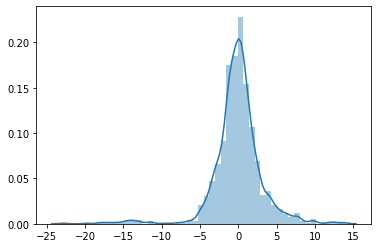

In [63]:
errors2 = preds2 - np.array(y_test).flatten()
sns.distplot(errors2) # We expect the distribution to be normal around zero!

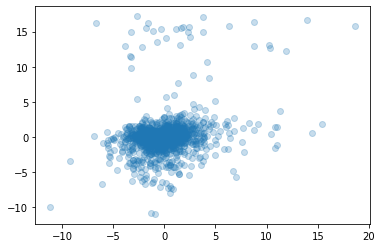

In [64]:
plt.scatter(preds2, np.array(y_test).flatten(), alpha=0.25)

#### 3.2. Probabilistic neural network predicting log profitability

In [65]:
from tensorflow_probability import layers as tfpl
from tensorflow_probability import distributions as tfd

In [66]:
model3 = tfk.Sequential([
    tfpl.DenseFlipout(32, activation='relu', input_shape=[X_train.shape[1]]),
    tfkl.Dense(1, activation='relu'),
    tfpl.DistributionLambda(make_distribution_fn=lambda t: tfd.Normal(
          loc=t, scale=1e-7 + tf.math.softplus(0.02 * t),
      ))
])

model3.compile(optimizer=tf.optimizers.Adam(1e-3), loss=tfk.losses.KLDivergence(), metrics=[])
model3.fit(np.array(X_train), np.array(y_train), validation_split=0.2, batch_size=150, 
          epochs=500, workers=10, use_multiprocessing=True)

Instructions for updating:
Please use `layer.add_weight` method instead.
Train on 2078 samples, validate on 520 samples
Epoch 1/500
2078/2078 [==============================] - 1s 399us/sample - loss: 1699.4948 - val_loss: 1694.3363
Epoch 2/500
2078/2078 [==============================] - 0s 27us/sample - loss: 1689.5181 - val_loss: 1684.2134
Epoch 3/500
2078/2078 [==============================] - 0s 29us/sample - loss: 1679.6872 - val_loss: 1674.4058
Epoch 4/500
2078/2078 [==============================] - 0s 24us/sample - loss: 1670.0543 - val_loss: 1664.8475
Epoch 5/500
2078/2078 [==============================] - 0s 25us/sample - loss: 1660.7245 - val_loss: 1655.6170
Epoch 6/500
2078/2078 [==============================] - 0s 21us/sample - loss: 1651.3493 - val_loss: 1646.0122
Epoch 7/500
2078/2078 [==============================] - 0s 21us/sample - loss: 1641.9586 - val_loss: 1636.6808
Epoch 8/500
2078/2078 [==============================] - 0s 20us/sample - loss: 1632.5232 - val

2078/2078 [==============================] - 0s 24us/sample - loss: 1080.5724 - val_loss: 1075.9462
Epoch 71/500
2078/2078 [==============================] - 0s 26us/sample - loss: 1072.0590 - val_loss: 1067.4618
Epoch 72/500
2078/2078 [==============================] - 0s 24us/sample - loss: 1063.5885 - val_loss: 1058.9913
Epoch 73/500
2078/2078 [==============================] - 0s 22us/sample - loss: 1055.1089 - val_loss: 1050.5875
Epoch 74/500
2078/2078 [==============================] - 0s 24us/sample - loss: 1046.6585 - val_loss: 1042.1347
Epoch 75/500
2078/2078 [==============================] - 0s 24us/sample - loss: 1038.2226 - val_loss: 1033.6464
Epoch 76/500
2078/2078 [==============================] - 0s 25us/sample - loss: 1029.8050 - val_loss: 1025.2890
Epoch 77/500
2078/2078 [==============================] - 0s 22us/sample - loss: 1021.3986 - val_loss: 1016.9071
Epoch 78/500
2078/2078 [==============================] - 0s 24us/sample - loss: 1013.0123 - val_loss: 1008.4

2078/2078 [==============================] - 0s 22us/sample - loss: 516.6523 - val_loss: 513.0610
Epoch 144/500
2078/2078 [==============================] - 0s 23us/sample - loss: 510.0022 - val_loss: 506.4223
Epoch 145/500
2078/2078 [==============================] - 0s 25us/sample - loss: 503.3821 - val_loss: 499.8226
Epoch 146/500
2078/2078 [==============================] - 0s 22us/sample - loss: 496.7977 - val_loss: 493.2634
Epoch 147/500
2078/2078 [==============================] - 0s 26us/sample - loss: 490.2559 - val_loss: 486.7415
Epoch 148/500
2078/2078 [==============================] - 0s 23us/sample - loss: 483.7576 - val_loss: 480.2591
Epoch 149/500
2078/2078 [==============================] - 0s 23us/sample - loss: 477.2856 - val_loss: 473.8127
Epoch 150/500
2078/2078 [==============================] - 0s 23us/sample - loss: 470.8588 - val_loss: 467.4079
Epoch 151/500
2078/2078 [==============================] - 0s 23us/sample - loss: 464.4773 - val_loss: 461.0719
Epoch 

2078/2078 [==============================] - 0s 24us/sample - loss: 145.9937 - val_loss: 144.2113
Epoch 217/500
2078/2078 [==============================] - 0s 26us/sample - loss: 142.6958 - val_loss: 140.9398
Epoch 218/500
2078/2078 [==============================] - 0s 25us/sample - loss: 139.4471 - val_loss: 137.7171
Epoch 219/500
2078/2078 [==============================] - 0s 22us/sample - loss: 136.2463 - val_loss: 134.5431
Epoch 220/500
2078/2078 [==============================] - 0s 21us/sample - loss: 133.0947 - val_loss: 131.4175
Epoch 221/500
2078/2078 [==============================] - 0s 20us/sample - loss: 129.9918 - val_loss: 128.3402
Epoch 222/500
2078/2078 [==============================] - 0s 23us/sample - loss: 126.9369 - val_loss: 125.3113
Epoch 223/500
2078/2078 [==============================] - 0s 20us/sample - loss: 123.9289 - val_loss: 122.3322
Epoch 224/500
2078/2078 [==============================] - 0s 19us/sample - loss: 120.9696 - val_loss: 119.3963
Epoch 

2078/2078 [==============================] - 0s 25us/sample - loss: 14.5604 - val_loss: 14.2442
Epoch 291/500
2078/2078 [==============================] - 0s 24us/sample - loss: 13.9659 - val_loss: 13.6609
Epoch 292/500
2078/2078 [==============================] - 0s 22us/sample - loss: 13.3915 - val_loss: 13.0970
Epoch 293/500
2078/2078 [==============================] - 0s 21us/sample - loss: 12.8364 - val_loss: 12.5520
Epoch 294/500
2078/2078 [==============================] - 0s 21us/sample - loss: 12.2999 - val_loss: 12.0254
Epoch 295/500
2078/2078 [==============================] - 0s 21us/sample - loss: 11.7818 - val_loss: 11.5169
Epoch 296/500
2078/2078 [==============================] - 0s 20us/sample - loss: 11.2812 - val_loss: 11.0259
Epoch 297/500
2078/2078 [==============================] - 0s 18us/sample - loss: 10.7986 - val_loss: 10.5521
Epoch 298/500
2078/2078 [==============================] - 0s 21us/sample - loss: 10.3320 - val_loss: 10.0949
Epoch 299/500
2078/2078 

Epoch 366/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.1176 - val_loss: 0.1183
Epoch 367/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.1030 - val_loss: 0.1046
Epoch 368/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.0893 - val_loss: 0.0910
Epoch 369/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.0782 - val_loss: 0.0789
Epoch 370/500
2078/2078 [==============================] - 0s 24us/sample - loss: 0.0648 - val_loss: 0.0673
Epoch 371/500
2078/2078 [==============================] - 0s 21us/sample - loss: 0.0536 - val_loss: 0.0565
Epoch 372/500
2078/2078 [==============================] - 0s 21us/sample - loss: 0.0431 - val_loss: 0.0465
Epoch 373/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.0334 - val_loss: 0.0371
Epoch 374/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.0244 - val_loss: 0.0285
Epoch 375/500
2078/2078 [===

2078/2078 [==============================] - 0s 25us/sample - loss: -0.0869 - val_loss: -0.0782
Epoch 441/500
2078/2078 [==============================] - 0s 23us/sample - loss: -0.0869 - val_loss: -0.0782
Epoch 442/500
2078/2078 [==============================] - 0s 24us/sample - loss: -0.0869 - val_loss: -0.0782
Epoch 443/500
2078/2078 [==============================] - 0s 23us/sample - loss: -0.0869 - val_loss: -0.0782
Epoch 444/500
2078/2078 [==============================] - 0s 26us/sample - loss: -0.0866 - val_loss: -0.0779
Epoch 445/500
2078/2078 [==============================] - 0s 22us/sample - loss: -0.0870 - val_loss: -0.0783
Epoch 446/500
2078/2078 [==============================] - 0s 24us/sample - loss: -0.0870 - val_loss: -0.0783
Epoch 447/500
2078/2078 [==============================] - 0s 25us/sample - loss: -0.0870 - val_loss: -0.0783
Epoch 448/500
2078/2078 [==============================] - 0s 23us/sample - loss: -0.0870 - val_loss: -0.0783
Epoch 449/500
2078/2078 

In [67]:
preds3 = model3.predict(X_test).flatten()

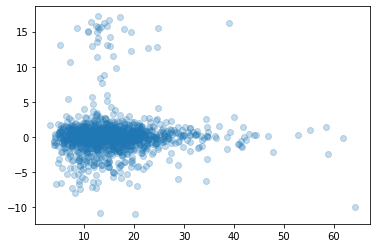

In [68]:
plt.scatter(preds3, np.array(y_test).flatten(), alpha=0.25)

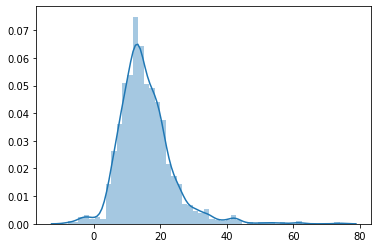

In [69]:
errors3 = preds3 - np.array(y_test).flatten()
sns.distplot(errors3)

#### 3.3 Traditional network with a classification problem instead

In [70]:
df["profitability"].head(10)

0    9.811553e-01
1    2.382856e+01
2    1.307847e+01
3    2.007407e+00
4    6.633332e+00
5    1.000000e-01
6    7.990000e+07
7    4.907538e+00
8    5.202172e+00
9    1.611993e+01
Name: profitability, dtype: float64

In [71]:
df["profitability"].describe()

count    3.878000e+03
mean     3.106848e+05
std      4.176109e+06
min      1.800000e-05
25%      4.534598e-01
50%      1.080599e+00
75%      2.260034e+00
max      1.682136e+08
Name: profitability, dtype: float64

In [142]:
def classify_ratio(ratio):
    if ratio < 1:
        return 0
    elif (ratio >= 1) and (ratio < 2):
        return 1
    else:
        return 2

In [171]:
df["profitability_class"] = df["profitability"].apply(lambda x : classify_ratio(x))
y3 = df["profitability_class"].values

y3_encoded = tfk.utils.to_categorical(y3)

X_train, X_test, y_train, y_test = train_test_split(normed_X, y3_encoded, test_size=0.33, random_state=42)

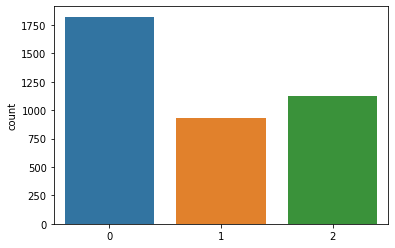

In [172]:
sns.countplot(y3)

In [196]:
model4 = tfk.Sequential([
#     tfkl.Dense(128, activation="selu"),
    tfkl.Dense(64, activation="sigmoid"),
    tfkl.Dense(3, activation="softmax")
])

model4.compile(optimizer=tfk.optimizers.Adam(1e-3),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
model4.fit(np.array(X_train), np.array(y_train), validation_split=0.33, 
           epochs=600, batch_size=128, use_multiprocessing=True, workers=10)

Train on 1740 samples, validate on 858 samples
Epoch 1/600
1740/1740 [==============================] - 0s 247us/sample - loss: 1.1185 - accuracy: 0.3397 - val_loss: 1.0624 - val_accuracy: 0.4545
Epoch 2/600
1740/1740 [==============================] - 0s 30us/sample - loss: 1.0656 - accuracy: 0.4615 - val_loss: 1.0563 - val_accuracy: 0.4557
Epoch 3/600
1740/1740 [==============================] - 0s 35us/sample - loss: 1.0486 - accuracy: 0.4667 - val_loss: 1.0405 - val_accuracy: 0.4615
Epoch 4/600
1740/1740 [==============================] - 0s 33us/sample - loss: 1.0378 - accuracy: 0.4695 - val_loss: 1.0345 - val_accuracy: 0.4814
Epoch 5/600
1740/1740 [==============================] - 0s 31us/sample - loss: 1.0305 - accuracy: 0.4695 - val_loss: 1.0293 - val_accuracy: 0.4720
Epoch 6/600
1740/1740 [==============================] - 0s 32us/sample - loss: 1.0249 - accuracy: 0.4718 - val_loss: 1.0258 - val_accuracy: 0.4709
Epoch 7/600
1740/1740 [==============================] - 0s 38us

Epoch 56/600
1740/1740 [==============================] - 0s 27us/sample - loss: 0.9737 - accuracy: 0.5167 - val_loss: 0.9970 - val_accuracy: 0.5117
Epoch 57/600
1740/1740 [==============================] - 0s 26us/sample - loss: 0.9732 - accuracy: 0.5144 - val_loss: 0.9959 - val_accuracy: 0.5093
Epoch 58/600
1740/1740 [==============================] - 0s 23us/sample - loss: 0.9729 - accuracy: 0.5144 - val_loss: 0.9951 - val_accuracy: 0.5105
Epoch 59/600
1740/1740 [==============================] - 0s 24us/sample - loss: 0.9741 - accuracy: 0.5149 - val_loss: 0.9949 - val_accuracy: 0.5047
Epoch 60/600
1740/1740 [==============================] - 0s 22us/sample - loss: 0.9719 - accuracy: 0.5167 - val_loss: 0.9951 - val_accuracy: 0.5070
Epoch 61/600
1740/1740 [==============================] - 0s 26us/sample - loss: 0.9711 - accuracy: 0.5195 - val_loss: 0.9949 - val_accuracy: 0.5012
Epoch 62/600
1740/1740 [==============================] - 0s 31us/sample - loss: 0.9714 - accuracy: 0.5201

Epoch 111/600
1740/1740 [==============================] - 0s 25us/sample - loss: 0.9480 - accuracy: 0.5385 - val_loss: 0.9829 - val_accuracy: 0.5105
Epoch 112/600
1740/1740 [==============================] - 0s 25us/sample - loss: 0.9464 - accuracy: 0.5351 - val_loss: 0.9835 - val_accuracy: 0.5093
Epoch 113/600
1740/1740 [==============================] - 0s 24us/sample - loss: 0.9459 - accuracy: 0.5408 - val_loss: 0.9831 - val_accuracy: 0.5105
Epoch 114/600
1740/1740 [==============================] - 0s 26us/sample - loss: 0.9459 - accuracy: 0.5425 - val_loss: 0.9829 - val_accuracy: 0.5140
Epoch 115/600
1740/1740 [==============================] - 0s 29us/sample - loss: 0.9466 - accuracy: 0.5328 - val_loss: 0.9831 - val_accuracy: 0.5152
Epoch 116/600
1740/1740 [==============================] - 0s 23us/sample - loss: 0.9447 - accuracy: 0.5391 - val_loss: 0.9833 - val_accuracy: 0.5245
Epoch 117/600
1740/1740 [==============================] - 0s 22us/sample - loss: 0.9448 - accuracy:

1740/1740 [==============================] - 0s 26us/sample - loss: 0.9240 - accuracy: 0.5529 - val_loss: 0.9782 - val_accuracy: 0.5291
Epoch 166/600
1740/1740 [==============================] - 0s 24us/sample - loss: 0.9240 - accuracy: 0.5552 - val_loss: 0.9791 - val_accuracy: 0.5280
Epoch 167/600
1740/1740 [==============================] - 0s 22us/sample - loss: 0.9231 - accuracy: 0.5563 - val_loss: 0.9781 - val_accuracy: 0.5245
Epoch 168/600
1740/1740 [==============================] - 0s 24us/sample - loss: 0.9227 - accuracy: 0.5534 - val_loss: 0.9787 - val_accuracy: 0.5245
Epoch 169/600
1740/1740 [==============================] - 0s 27us/sample - loss: 0.9232 - accuracy: 0.5546 - val_loss: 0.9794 - val_accuracy: 0.5256
Epoch 170/600
1740/1740 [==============================] - 0s 24us/sample - loss: 0.9216 - accuracy: 0.5569 - val_loss: 0.9785 - val_accuracy: 0.5256
Epoch 171/600
1740/1740 [==============================] - 0s 23us/sample - loss: 0.9212 - accuracy: 0.5569 - val_

Epoch 220/600
1740/1740 [==============================] - 0s 27us/sample - loss: 0.9007 - accuracy: 0.5805 - val_loss: 0.9790 - val_accuracy: 0.5361
Epoch 221/600
1740/1740 [==============================] - 0s 24us/sample - loss: 0.9002 - accuracy: 0.5770 - val_loss: 0.9781 - val_accuracy: 0.5326
Epoch 222/600
1740/1740 [==============================] - 0s 25us/sample - loss: 0.8991 - accuracy: 0.5793 - val_loss: 0.9775 - val_accuracy: 0.5291
Epoch 223/600
1740/1740 [==============================] - 0s 24us/sample - loss: 0.8986 - accuracy: 0.5805 - val_loss: 0.9777 - val_accuracy: 0.5350
Epoch 224/600
1740/1740 [==============================] - 0s 23us/sample - loss: 0.8979 - accuracy: 0.5799 - val_loss: 0.9774 - val_accuracy: 0.5303
Epoch 225/600
1740/1740 [==============================] - 0s 21us/sample - loss: 0.8976 - accuracy: 0.5822 - val_loss: 0.9784 - val_accuracy: 0.5315
Epoch 226/600
1740/1740 [==============================] - 0s 22us/sample - loss: 0.8968 - accuracy:

1740/1740 [==============================] - 0s 29us/sample - loss: 0.8752 - accuracy: 0.5925 - val_loss: 0.9805 - val_accuracy: 0.5338
Epoch 275/600
1740/1740 [==============================] - 0s 30us/sample - loss: 0.8766 - accuracy: 0.5954 - val_loss: 0.9801 - val_accuracy: 0.5396
Epoch 276/600
1740/1740 [==============================] - 0s 25us/sample - loss: 0.8745 - accuracy: 0.5925 - val_loss: 0.9804 - val_accuracy: 0.5443
Epoch 277/600
1740/1740 [==============================] - 0s 24us/sample - loss: 0.8741 - accuracy: 0.5994 - val_loss: 0.9817 - val_accuracy: 0.5338
Epoch 278/600
1740/1740 [==============================] - 0s 28us/sample - loss: 0.8731 - accuracy: 0.5971 - val_loss: 0.9803 - val_accuracy: 0.5466
Epoch 279/600
1740/1740 [==============================] - 0s 26us/sample - loss: 0.8736 - accuracy: 0.5914 - val_loss: 0.9798 - val_accuracy: 0.5443
Epoch 280/600
1740/1740 [==============================] - 0s 23us/sample - loss: 0.8723 - accuracy: 0.5983 - val_

Epoch 329/600
1740/1740 [==============================] - 0s 23us/sample - loss: 0.8494 - accuracy: 0.6132 - val_loss: 0.9846 - val_accuracy: 0.5338
Epoch 330/600
1740/1740 [==============================] - 0s 25us/sample - loss: 0.8491 - accuracy: 0.6126 - val_loss: 0.9850 - val_accuracy: 0.5396
Epoch 331/600
1740/1740 [==============================] - 0s 21us/sample - loss: 0.8491 - accuracy: 0.6103 - val_loss: 0.9843 - val_accuracy: 0.5385
Epoch 332/600
1740/1740 [==============================] - 0s 24us/sample - loss: 0.8488 - accuracy: 0.6155 - val_loss: 0.9846 - val_accuracy: 0.5408
Epoch 333/600
1740/1740 [==============================] - 0s 21us/sample - loss: 0.8479 - accuracy: 0.6155 - val_loss: 0.9847 - val_accuracy: 0.5361
Epoch 334/600
1740/1740 [==============================] - 0s 23us/sample - loss: 0.8470 - accuracy: 0.6155 - val_loss: 0.9847 - val_accuracy: 0.5373
Epoch 335/600
1740/1740 [==============================] - 0s 22us/sample - loss: 0.8478 - accuracy:

1740/1740 [==============================] - 0s 22us/sample - loss: 0.8253 - accuracy: 0.6230 - val_loss: 0.9926 - val_accuracy: 0.5373
Epoch 384/600
1740/1740 [==============================] - 0s 21us/sample - loss: 0.8252 - accuracy: 0.6236 - val_loss: 0.9926 - val_accuracy: 0.5303
Epoch 385/600
1740/1740 [==============================] - 0s 20us/sample - loss: 0.8242 - accuracy: 0.6276 - val_loss: 0.9936 - val_accuracy: 0.5396
Epoch 386/600
1740/1740 [==============================] - 0s 22us/sample - loss: 0.8240 - accuracy: 0.6322 - val_loss: 0.9933 - val_accuracy: 0.5256
Epoch 387/600
1740/1740 [==============================] - 0s 21us/sample - loss: 0.8244 - accuracy: 0.6178 - val_loss: 0.9942 - val_accuracy: 0.5245
Epoch 388/600
1740/1740 [==============================] - 0s 20us/sample - loss: 0.8223 - accuracy: 0.6236 - val_loss: 0.9940 - val_accuracy: 0.5338
Epoch 389/600
1740/1740 [==============================] - 0s 21us/sample - loss: 0.8222 - accuracy: 0.6276 - val_

Epoch 438/600
1740/1740 [==============================] - 0s 21us/sample - loss: 0.8011 - accuracy: 0.6374 - val_loss: 1.0023 - val_accuracy: 0.5221
Epoch 439/600
1740/1740 [==============================] - 0s 21us/sample - loss: 0.8009 - accuracy: 0.6414 - val_loss: 1.0026 - val_accuracy: 0.5256
Epoch 440/600
1740/1740 [==============================] - 0s 21us/sample - loss: 0.8007 - accuracy: 0.6368 - val_loss: 1.0033 - val_accuracy: 0.5186
Epoch 441/600
1740/1740 [==============================] - 0s 20us/sample - loss: 0.8001 - accuracy: 0.6362 - val_loss: 1.0037 - val_accuracy: 0.5256
Epoch 442/600
1740/1740 [==============================] - 0s 28us/sample - loss: 0.8001 - accuracy: 0.6391 - val_loss: 1.0036 - val_accuracy: 0.5186
Epoch 443/600
1740/1740 [==============================] - 0s 25us/sample - loss: 0.7985 - accuracy: 0.6379 - val_loss: 1.0034 - val_accuracy: 0.5152
Epoch 444/600
1740/1740 [==============================] - 0s 24us/sample - loss: 0.7984 - accuracy:

1740/1740 [==============================] - 0s 21us/sample - loss: 0.7789 - accuracy: 0.6552 - val_loss: 1.0124 - val_accuracy: 0.5163
Epoch 493/600
1740/1740 [==============================] - 0s 23us/sample - loss: 0.7776 - accuracy: 0.6546 - val_loss: 1.0117 - val_accuracy: 0.5186
Epoch 494/600
1740/1740 [==============================] - 0s 26us/sample - loss: 0.7774 - accuracy: 0.6546 - val_loss: 1.0124 - val_accuracy: 0.5117
Epoch 495/600
1740/1740 [==============================] - 0s 25us/sample - loss: 0.7771 - accuracy: 0.6557 - val_loss: 1.0122 - val_accuracy: 0.5163
Epoch 496/600
1740/1740 [==============================] - 0s 23us/sample - loss: 0.7770 - accuracy: 0.6546 - val_loss: 1.0130 - val_accuracy: 0.5198
Epoch 497/600
1740/1740 [==============================] - 0s 26us/sample - loss: 0.7767 - accuracy: 0.6540 - val_loss: 1.0138 - val_accuracy: 0.5140
Epoch 498/600
1740/1740 [==============================] - 0s 24us/sample - loss: 0.7761 - accuracy: 0.6552 - val_

Epoch 547/600
1740/1740 [==============================] - 0s 21us/sample - loss: 0.7555 - accuracy: 0.6644 - val_loss: 1.0231 - val_accuracy: 0.5140
Epoch 548/600
1740/1740 [==============================] - 0s 21us/sample - loss: 0.7553 - accuracy: 0.6707 - val_loss: 1.0232 - val_accuracy: 0.5128
Epoch 549/600
1740/1740 [==============================] - 0s 20us/sample - loss: 0.7552 - accuracy: 0.6724 - val_loss: 1.0236 - val_accuracy: 0.5023
Epoch 550/600
1740/1740 [==============================] - 0s 22us/sample - loss: 0.7548 - accuracy: 0.6718 - val_loss: 1.0237 - val_accuracy: 0.5128
Epoch 551/600
1740/1740 [==============================] - 0s 20us/sample - loss: 0.7545 - accuracy: 0.6667 - val_loss: 1.0238 - val_accuracy: 0.5105
Epoch 552/600
1740/1740 [==============================] - 0s 23us/sample - loss: 0.7535 - accuracy: 0.6782 - val_loss: 1.0235 - val_accuracy: 0.5093
Epoch 553/600
1740/1740 [==============================] - 0s 21us/sample - loss: 0.7532 - accuracy:

In [197]:
test_loss, test_acc = model4.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

1280/1280 - 0s - loss: 1.0055 - accuracy: 0.5188

Test accuracy: 0.51875


In [198]:
probability_model = tf.keras.Sequential([model4, 
                                         tf.keras.layers.Softmax()])
preds4 = probability_model.predict(np.array(X_test))

In [199]:
preds4 # each row represents the probablities that this instance falls into one of the 3 classes 

array([[0.22318748, 0.2184268 , 0.55838567],
       [0.24012959, 0.22873363, 0.5311368 ],
       [0.32018167, 0.32644364, 0.35337463],
       ...,
       [0.5112069 , 0.24567634, 0.24311675],
       [0.31309757, 0.4371716 , 0.24973083],
       [0.40069553, 0.26145837, 0.3378461 ]], dtype=float32)

In [200]:
preds4_concrete = np.argmax(preds4, axis=1)
preds4_concrete

array([2, 2, 2, ..., 0, 1, 0])